# AICP Internship Task

Search Queries Anomaly Detection is a technique to identify unusual or unexpected patterns in
search query data. Below is the process we can follow for the task of Search Queries Anomaly
Detection:
1. Gather historical search query data from the source,
   such as a search engine or a website’s search functionality.

2. Conduct an initial analysis to understand the distribution of search queries,
   their frequency, and any noticeable patterns or trends.

3. Create relevant features or attributes from the search query data that can aid in anomaly detection.

4. Choose an appropriate anomaly detection algorithm. Common methods include statistical approaches
   like Z-score analysis and machine learning algorithms like Isolation Forests or One-Class SVM.

5. Train the selected model on the prepared data.

6. Apply the trained model to the search query data to identify anomalies or outliers


Find the Dataset **“Queries.csv”**.

The dataset we have contains search queries that lead users to a specific website, along with
associated metrics. The columns in this dataset are:
* **Top Queries**: The actual search terms used by users.
* **Clicks**: The number of times users clicked on the website after using the query.
* **Impressions**: The number of times the website appeared in search results for the query.
* **CTR (Click Through Rate)**: The ratio of clicks to impressions, indicating the effectiveness of
    the query in leading users to the website.
* **Position**: The average ranking of the website in search results for the query.

The problem at hand is to utilize the available dataset to detect anomalies in search queries —
queries that perform significantly differently from the majority. The goal is to identify queries
that are either underperforming or overperforming in terms of clicks, impressions, CTR, and
search position.

Import Necessary libraries like:

- import pandas as pd
- from collections import Counter
- import re
- import plotly.express as px
- import plotly.io as pio
- pio.templates.default = "plotly_white"

## Q1

Import data and check null values, check column info and the descriptive statistics of the data.

In [3]:
# importing pandas library
import pandas as pd

In [4]:
# importing excel file to use data
dataset = pd.read_csv("Queries.csv")

In [5]:
# displaying first 5 columns
dataset.head(5)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


In [6]:
# detecting null values
null_values = dataset.isnull()

In [7]:
print(null_values)

     Top queries  Clicks  Impressions    CTR  Position
0          False   False        False  False     False
1          False   False        False  False     False
2          False   False        False  False     False
3          False   False        False  False     False
4          False   False        False  False     False
..           ...     ...          ...    ...       ...
995        False   False        False  False     False
996        False   False        False  False     False
997        False   False        False  False     False
998        False   False        False  False     False
999        False   False        False  False     False

[1000 rows x 5 columns]


In [8]:
# adding up all the null values to get total
null_values.sum()

Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64

In [9]:
# column information
columninfo = dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [10]:
# calculating statistics
statistics = dataset.describe()

In [11]:
print(statistics)

          Clicks   Impressions     Position
count  1000.0000   1000.000000  1000.000000
mean    172.2750   1939.466000     3.985930
std     281.0221   4856.702605     2.841842
min      48.0000     62.000000     1.000000
25%      64.0000    311.000000     2.010000
50%      94.0000    590.500000     3.120000
75%     169.0000   1582.750000     5.342500
max    5223.0000  73380.000000    28.520000


## Q2

Now convert the CTR column from a percentage string to a float


In [12]:
# removing % from CTR
dataset['CTR'] = dataset['CTR'].str.rstrip('%')

In [13]:
dataset.head(2)

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83,1.61
1,thecleverprogrammer,2809,3456,81.28,1.02


In [14]:
# converting it from str to float
dataset['CTR'] = dataset['CTR'].astype(float)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   float64
 4   Position     1000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 39.2+ KB


## Q3

Now analyze common words in each search query in the following manner:
- Create a function to clean and split the queries into words.
- Split each query into words and count the frequency of each word.
- Plot the word frequencies


In [16]:
# importing library to plot graphs
import matplotlib.pyplot as plt
from collections import Counter
import re

In [17]:
def clean_and_split(query):
    # Clean the query by removing non-alphanumeric characters and converting them to lowercase
    cleaned_query = re.sub(r'[^a-zA-Z0-9\s]', '', query.lower())
    # Split the query into words
    words = cleaned_query.split()
    return words

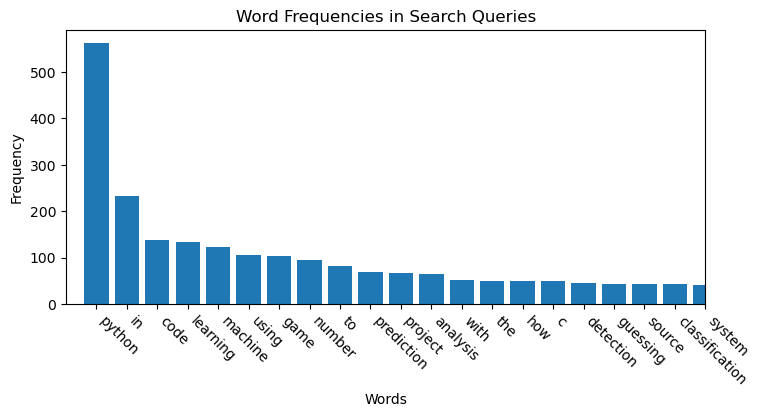

In [18]:
def plot_word_frequencies(queries):
    # Combine all queries into a single string
    all_queries = ' '.join(queries)
    # Clean and split the combined queries into words
    all_words = clean_and_split(all_queries)
    # Count the frequency of each word
    word_counts = Counter(all_words)
    # Sort the words and their counts by frequency
    sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    # Separate words and counts for plotting
    words, counts = zip(*sorted_word_counts)
    
    # Plot the word frequencies
    plt.figure(figsize=(8, 5))
    plt.bar(words, counts)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Word Frequencies in Search Queries')
    plt.xticks(rotation = 315, ha='left')
    plt.tight_layout()
    plt.xlim(-1, 20)
    plt.show()

plot_word_frequencies(dataset['Top queries'])


## Q4

 Now have a look at the top queries by clicks and impressions

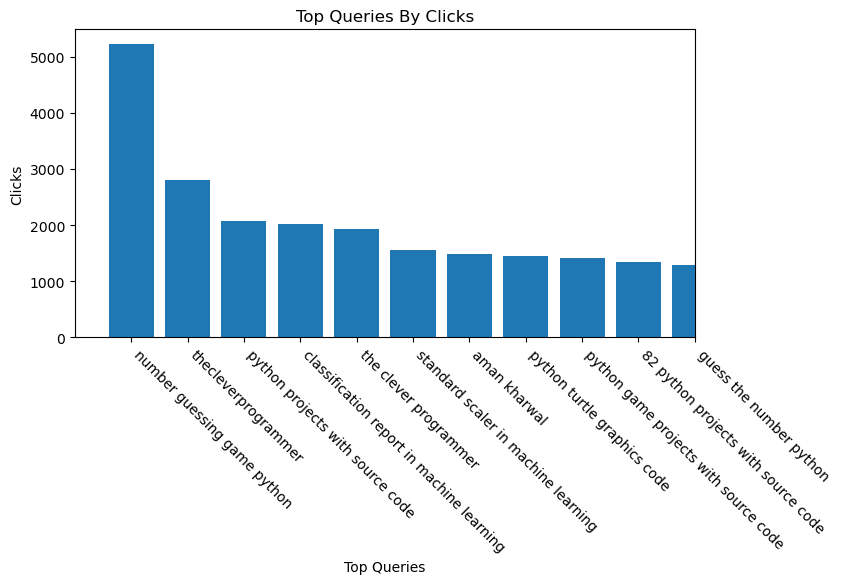

In [19]:
# plotting graph
plt.figure(figsize = (8, 4))
plt.bar(dataset['Top queries'], dataset['Clicks'])
plt.xlabel("Top Queries")
plt.ylabel("Clicks")
plt.title("Top Queries By Clicks")
plt.xticks(rotation = 315, ha = 'left')
plt.xlim(-1, 10)
plt.show()

In [20]:
# sorting data with respect to Impressions to plot top impressions
dataset_sorted1 = dataset.sort_values(by = ['Impressions'], ascending = False)

In [21]:
dataset_sorted1.head()

,Top queries,Clicks,Impressions,CTR,Position
2,python projects with source code,2077,73380,2.83,5.94
82,r2 score,367,56322,0.65,9.33
34,machine learning roadmap,708,42715,1.66,8.97
21,classification report,933,39896,2.34,7.53
232,standardscaler,177,39267,0.45,10.23


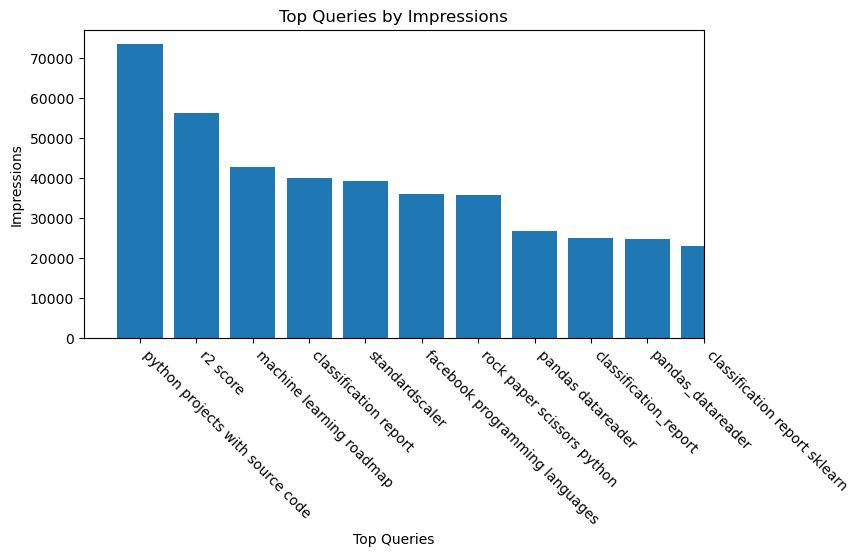

In [22]:
# plotting graph
plt.figure(figsize = (8, 4))
plt.bar(dataset_sorted1['Top queries'], dataset_sorted1['Impressions'])
plt.xlabel("Top Queries")
plt.ylabel("Impressions")
plt.title("Top Queries by Impressions")
plt.xticks(rotation = 315, ha = 'left')
plt.xlim(-1, 10)
plt.show()

## Q5

Now analyze the queries with the highest and lowest CTRs

In [23]:
# sorting data with respect to CTR to plot top CTR
dataset_sorted2 = dataset.sort_values(by = 'CTR', ascending = False)

In [24]:
dataset_sorted2.head()

,Top queries,Clicks,Impressions,CTR,Position
928,the cleverprogrammer.com,53,62,85.48,1.00
927,the clever programmer.com,53,64,82.81,1.00
1,thecleverprogrammer,2809,3456,81.28,1.02
732,the clever programmer python project,66,84,78.57,1.00
307,the clever programmer machine learning projects,140,181,77.35,1.00


In [ ]:
# plotting graph
plt.figure(figsize = (8, 4))
plt.bar(dataset_sorted2['Top queries'], dataset_sorted2['CTR'])
plt.xlabel("Top Queries")
plt.ylabel("CTR")
plt.title("Top Queries by CTR")
plt.xticks(rotation = 315, ha = 'left')
plt.xlim(-1, 10)
plt.show()

In [25]:
# sorting data with respect to CTR to plot Bottom CTR
dataset_sorted3 = dataset.sort_values(by = 'CTR', ascending = True)

In [26]:
dataset_sorted3.head()

,Top queries,Clicks,Impressions,CTR,Position
929,python turtle,52,18228,0.29,18.75
232,standardscaler,177,39267,0.45,10.23
423,classification report sklearn,109,22969,0.47,9.08
544,standard scaler,86,17800,0.48,9.68
981,r2 score sklearn,49,7871,0.62,7.92


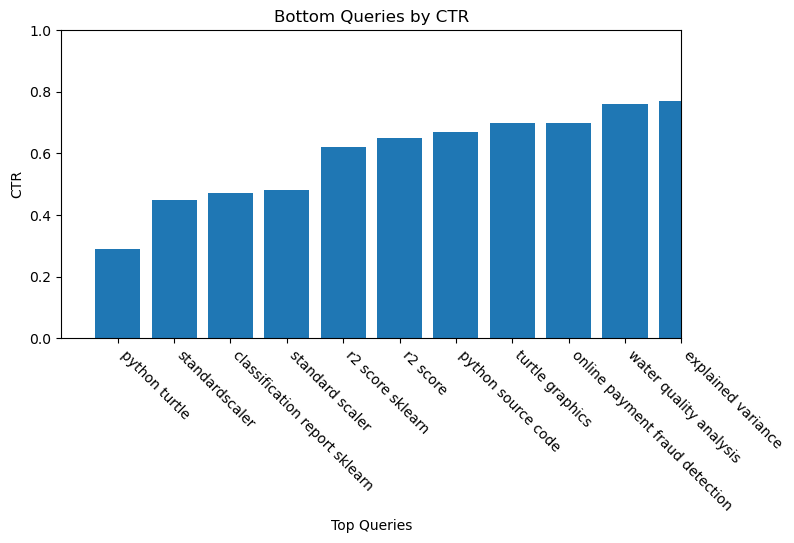

In [27]:
# plotting graph
plt.figure(figsize = (8, 4))
plt.bar(dataset_sorted3['Top queries'], dataset_sorted3['CTR'])
plt.xlabel("Top Queries")
plt.ylabel("CTR")
plt.title("Bottom Queries by CTR")
plt.xticks(rotation = 315, ha = 'left')
plt.xlim(-1, 10)
plt.ylim(0, 1)
plt.show()

## Q6

Now check the correlation between different metrics. Also explain your observation from
the correlation matrix


In [28]:
# removing str column from data to calculate correlation
dataset_numbers = dataset.drop('Top queries', axis = 1)

In [29]:
dataset_numbers.head(2)

,Clicks,Impressions,CTR,Position
0,5223,14578,35.83,1.61
1,2809,3456,81.28,1.02


In [30]:
# using .corr() function to find correlation
corr_dataset = dataset_numbers.corr()

In [31]:
# importing seaborn to plot correlation matrix
import seaborn as sns

<Axes: >

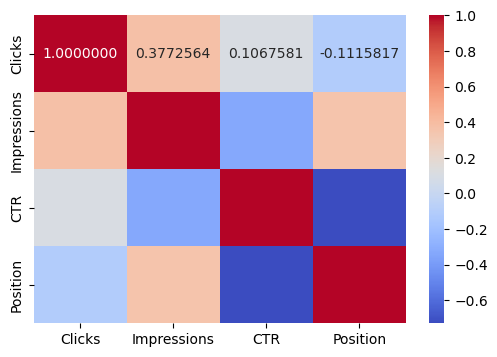

In [32]:
# plotting graph
plt.figure(figsize = (6, 4))
sns.heatmap(corr_dataset, cmap = 'coolwarm', fmt = '.7f', annot = True)

## Q7

Now, detect anomalies in search queries. You can use various techniques for anomaly
detection. A simple and effective method is the Isolation Forest algorithm, which works well with
different data distributions and is efficient with large datasets.

In [33]:
# importing library to detect anomalies
from sklearn.ensemble import IsolationForest

In [34]:
# Using Isolation Forest to detect Anomalies
model = IsolationForest(n_estimators = 100, contamination = 0.01)

In [35]:
# Giving input to a model
model.fit(dataset_numbers)

IsolationForest(contamination=0.01)

In [36]:
# Creating column that will store model predicted value
dataset['Anomaly'] = model.predict(dataset_numbers)

In [37]:
# Isolation Forest gives -1 in case of 0
anomalies = dataset[dataset['Anomaly'] == -1]

In [38]:
# printing the Final Output
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'Position']])

                                  Top queries  Clicks  Impressions  Position
0                 number guessing game python    5223        14578      1.61
1                         thecleverprogrammer    2809         3456      1.02
2            python projects with source code    2077        73380      5.94
3   classification report in machine learning    2012         4959      1.28
4                       the clever programmer    1931         2528      1.09
15                 rock paper scissors python    1111        35824      7.19
21                      classification report     933        39896      7.53
34                   machine learning roadmap     708        42715      8.97
82                                   r2 score     367        56322      9.33
91             facebook programming languages     346        36055      1.58
